<Figure size 432x288 with 0 Axes>

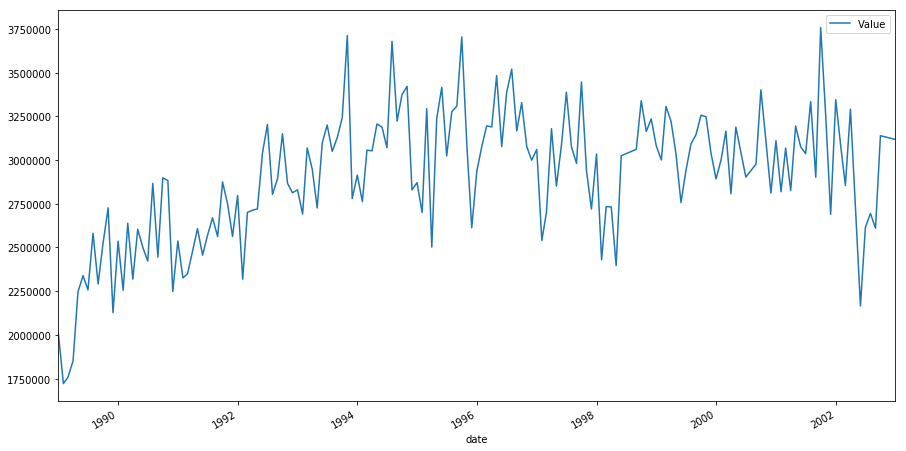

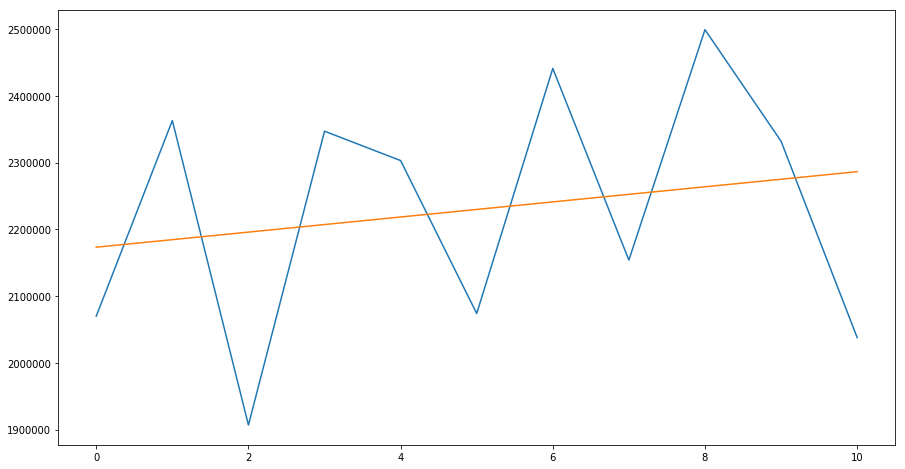

In [3]:
""" -------------------------------------------------------------------------------------------------------
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ APPLIED DATA SCIENCE: FINAL PROJECT! ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    -------------------------------------------------------------------------------------------------------
        
                        # =================== Final Project: Parts 2 & 3 ====================
                        # ============ Author: Savannah McCoy, Azeezah Muhammad =============
                        # ================ Howard University -- Fall 2018 ===================
                        # ================ CSCI 473: Applied Data Science ===================

"""

import os, sys, json, math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats
    
    
def part_2a(df):
    
    df['date'] = df['reference_period_desc'] + df['year']		# add 'year' to 'reference period'(month) for full date
    df['date'] = pd.to_datetime(df['date'])						# convert 'date' string to date format
    df['Value'] = df['Value'].apply(to_float)					# convert 'Value' column to float

    fig = plt.figure(); df.plot(x='date', y='Value', style='-', figsize=(15,8))
    plt.xlim(pd.Timestamp('1989-01-01'), pd.Timestamp('2002-12-31'))
    plt.show(); plt.close(fig)									# TODO: Save plots as images in folder
    return df

    
def part_3a(df):
    
    df_2017 = df[(df['date'] > '2017-1-1') & (df['date'] <= '2017-12-31')]		# filter values
    x = np.arange(0, len(df_2017.index))
    y = df_2017['Value']
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)		# calculate linear reg
    line = slope*x + intercept													# linear reg line  
    return x, y, line


def part_3b(df):
    return df

def part_3c(df):
    return df

def part_3d(df):
    return df

def part_3e(x, y, line):
    fig = plt.figure(figsize=(15,8))
    plt.plot(x, y,'-', x, line)
    plt.show(); plt.close(fig)	
    return df


def to_float(x):
    num = x.replace(",", "")
    return float(num)


def to_dataframe(file_name):
    json_df = pd.read_json(os.getcwd() + "/" + file_name)	# read json file to dataframe
    return json_df['data'].apply(pd.Series)					# turn 'data' column into its own dataframe


if __name__ == "__main__":
    file = 'data.json'
    df = to_dataframe(file)
    df 			= part_2a(df)
    x, y, line	= part_3a(df)
#     df = part_3b(df)
#     df = part_3c(df)
#     df = part_3d(df)
    part_3e(x, y, line)
    